# Building an ANN algorithm to predict the Burned Area of Forest Fires

### Problem Statement: PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS
month	month of the year: 'jan' to 'dec'

day	day of the week: 'mon' to 'sun'

FFMC	FFMC index from the FWI system: 18.7 to 96.20

DMC	DMC index from the FWI system: 1.1 to 291.3

DC	DC index from the FWI system: 7.9 to 860.6

ISI	ISI index from the FWI system: 0.0 to 56.10

temp	temperature in Celsius degrees: 2.2 to 33.30

RH	relative humidity in %: 15.0 to 100

wind	wind speed in km/h: 0.40 to 9.40

rain	outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
#Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
df=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\16. Neural Networks-NN\forestfires.csv")

# Data Preprocessing & EDA

In [4]:
df.shape

(517, 31)

In [5]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
df.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [8]:
#Check for duplicates
duplicates=df[df.duplicated()]
duplicates

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
# Droping duplicate values from the original dataset
df=df.drop_duplicates()

In [10]:
df.shape

(509, 31)

In [11]:
# Check for missing values
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [12]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

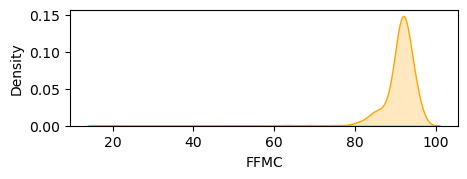

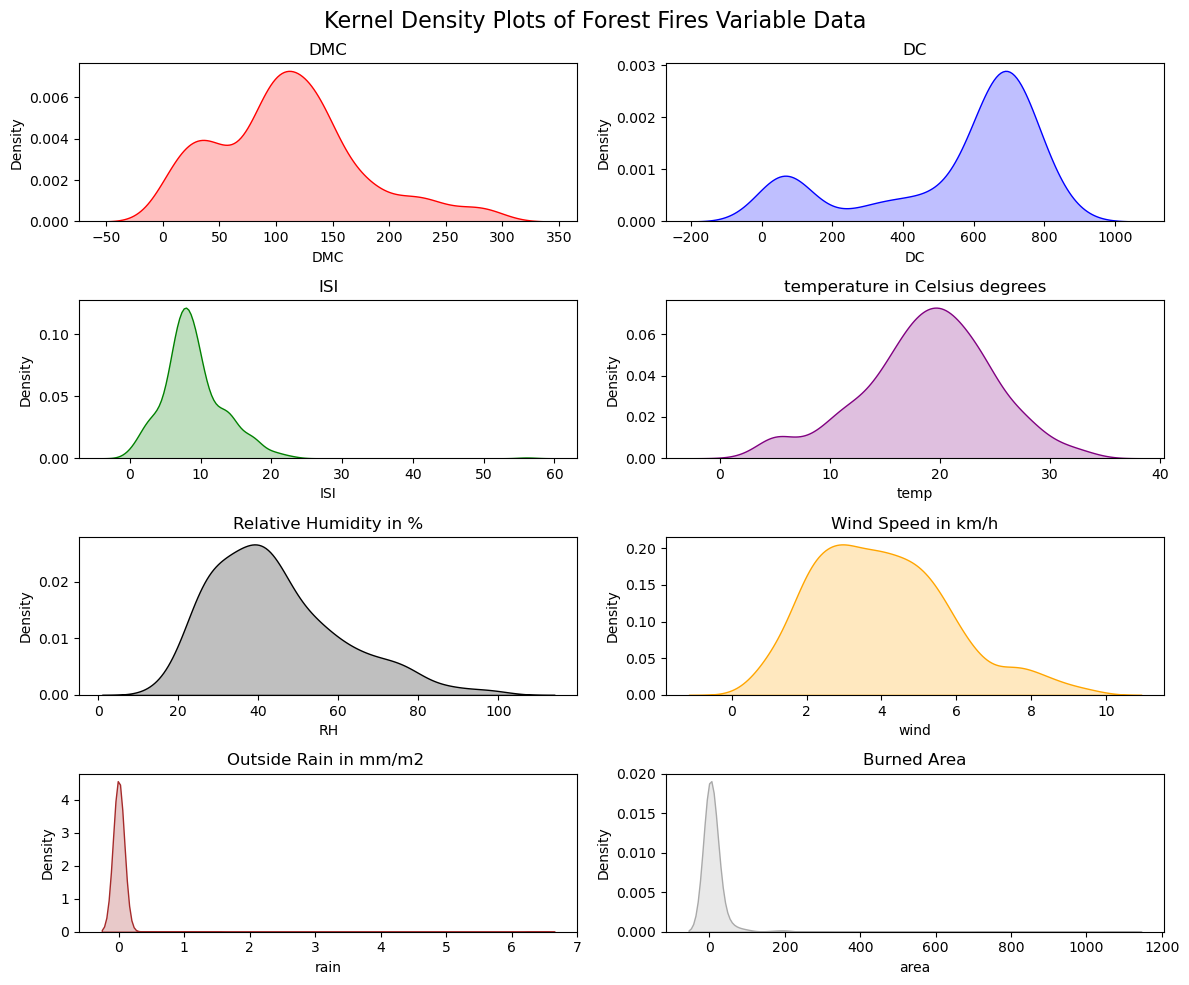

In [13]:
#Creating Subplots to visualize independent variables data
plt.figure(figsize=(5,1.5)) 
sns.kdeplot(df['FFMC'], shade=True, color='orange')


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))

#Plot KDE plots  

sns.kdeplot(ax=axes[0,0], data=df['DMC'], shade=True, color='red')
sns.kdeplot(ax=axes[0,1], data=df['DC'], shade=True, color='blue')
sns.kdeplot(ax=axes[1,0], data=df['ISI'], shade=True, color='green')
sns.kdeplot(ax=axes[1,1], data=df['temp'], shade=True, color='purple')
sns.kdeplot(ax=axes[2,0], data=df['RH'], shade=True, color='black')
sns.kdeplot(ax=axes[2,1], data=df['wind'], shade=True, color='orange')
sns.kdeplot(ax=axes[3,0], data=df['rain'], shade=True, color='brown')
sns.kdeplot(ax=axes[3,1], data=df['area'], shade=True, color='darkgrey')



#Set plot titles and labels
axes[0,0].set_title('DMC')
axes[0,1].set_title('DC')
axes[1,0].set_title('ISI')
axes[1,1].set_title('temperature in Celsius degrees')
axes[2,0].set_title('Relative Humidity in %')
axes[2,1].set_title('Wind Speed in km/h')
axes[3,0].set_title('Outside Rain in mm/m2 ')
axes[3,1].set_title('Burned Area')


fig.suptitle('Kernel Density Plots of Forest Fires Variable Data', fontsize=16)
plt.tight_layout()
plt.show()

##  Key Insights from KDE plot:
### DC follows left skewed distribution
### The variables  DMC,ISI, temperature, RH, wind are follows approximately Normal distribution
### Rain & Area follows Leptokurtic distribution

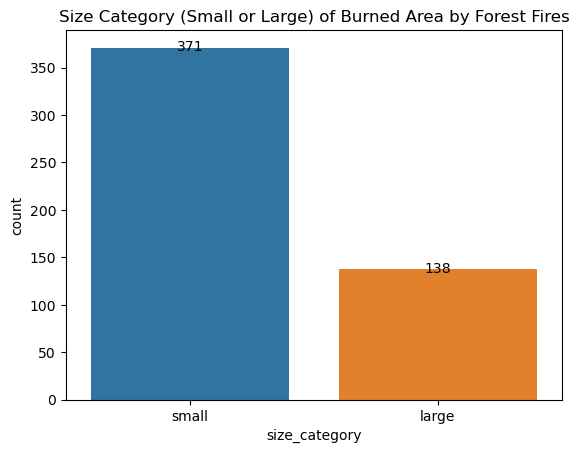

In [14]:
#plotting Target Variable
ax=sns.countplot(x='size_category', data=df)
_ = [ax.text(p.get_x() + p.get_width()/2., p.get_height() + 0.5, f'{p.get_height():.0f}', 
             ha='center', va='center') for p in ax.patches]

plt.title('Size Category (Small or Large) of Burned Area by Forest Fires')
plt.show()

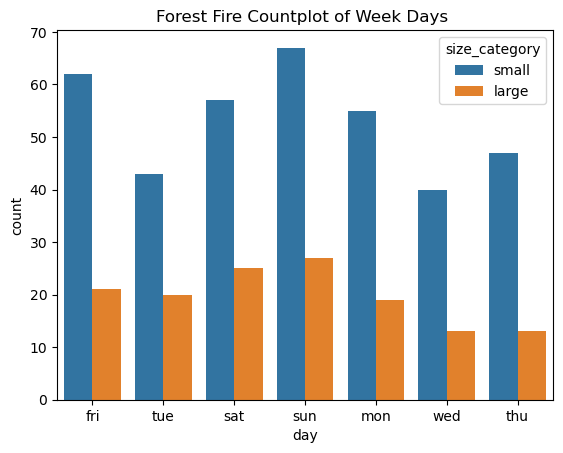

In [15]:
sns.countplot(x='day', hue='size_category', data=df)
plt.title('Forest Fire Countplot of Week Days ')
plt.show()

## Key insights:
### Forect fires highly occurring in larger area on Sundays  & saturdays
### Forest fires highly occurring in smaller area on sunadys, fridays followed by saturdays

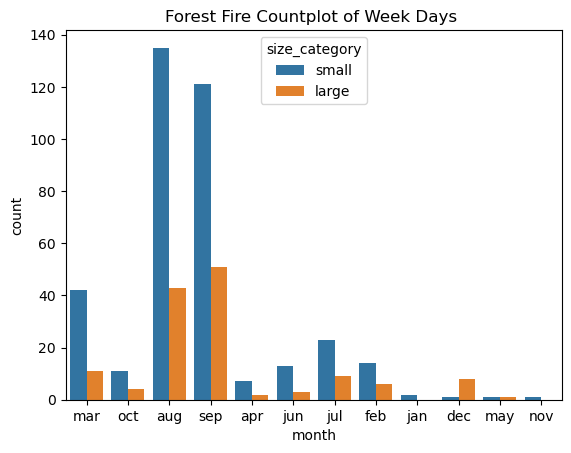

In [16]:
sns.countplot(x='month', hue='size_category', data=df)
plt.title('Forest Fire Countplot of Week Days ')
plt.show()

## Key insights from the above Countplot:
### Forest fires mostly occurring in August and September month
### Less chances that the forest fire occur in the month of Jan, Nov & May 

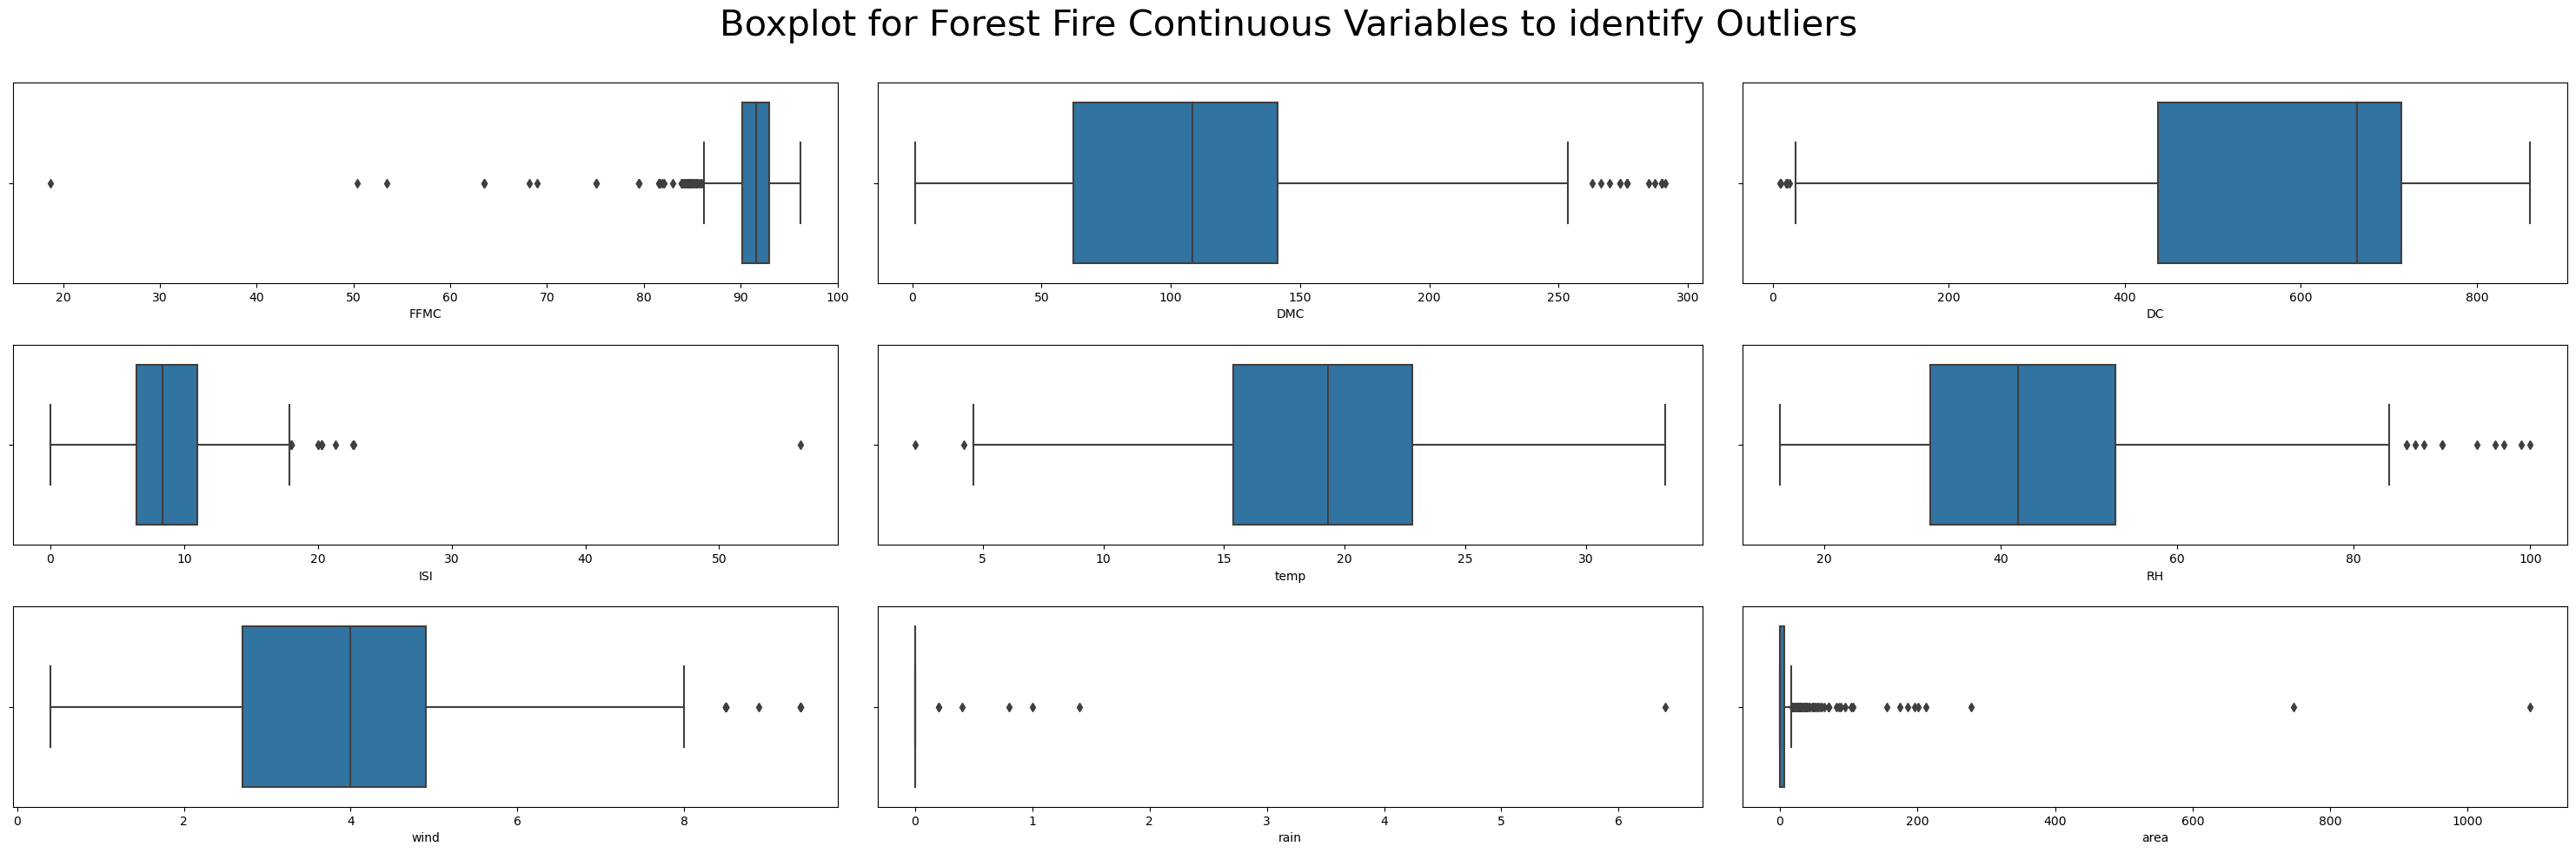

In [17]:
#check for outliers
fig, ax=plt.subplots(3,3, figsize=(30,10), sharex= False, sharey = False)

sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.ISI, ax=ax[1,0])
sns.boxplot(df.temp, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
sns.boxplot(df.wind, ax=ax[2,0])
sns.boxplot(df.rain, ax=ax[2,1])
sns.boxplot(df.area, ax=ax[2,2])

plt.suptitle("Boxplot for Forest Fire Continuous Variables to identify Outliers", fontsize= 30, y = 0.99)
plt.tight_layout(pad=2.0)

plt.show()

# The data  has outliers as we can see from the above boxplots, lets check and remove outliers

In [18]:
# finding outliers
from sklearn.ensemble import IsolationForest
cols=['FFMC', 'DMC', 'DC', 'ISI', 'temp','RH','wind','rain','area']
data=df[cols]

In [19]:
#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data)

IsolationForest(contamination=0.001, random_state=10)

In [20]:
data['anamoly'] = clf.predict(data.iloc[:,0:11])
outliers = data[data['anamoly']==-1]

In [21]:
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,anamoly
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.0,-1


In [22]:
df=df.drop(outliers.index)

In [23]:
df.shape

(508, 31)

In [24]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [25]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [26]:
df=df.drop(['month','day'], axis=1)

In [27]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [28]:
df.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [29]:
# Converting Size_category into numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['size_category']=le.fit_transform(df['size_category'])

In [30]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [31]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.415829,0.359202,0.590957,0.457136,-0.271128,-0.091348,0.061744,0.043786,0.011771,...,-0.349818,-0.084607,0.032426,-0.056916,-0.101945,-0.047158,-0.110010,-0.011754,0.076084,-0.010679
DMC,0.415829,1.000000,0.679833,0.304863,0.466851,0.075347,-0.111039,0.070990,0.076472,-0.012679,...,-0.321314,-0.074520,-0.000257,-0.048508,-0.407346,-0.082763,-0.075009,-0.189266,0.117770,-0.044687
DC,0.359202,0.679833,1.000000,0.225242,0.493395,-0.038310,-0.209114,0.033642,0.051054,-0.002969,...,-0.403738,-0.096708,-0.102532,-0.179671,-0.651462,-0.115460,-0.079240,0.093786,0.537654,-0.026620
ISI,0.590957,0.304863,0.225242,1.000000,0.390375,-0.124638,0.098796,0.062102,0.007672,0.050089,...,-0.252254,-0.059714,0.020005,0.119527,-0.145484,-0.061132,-0.077216,-0.072356,-0.072685,0.010275
temp,0.457136,0.466851,0.493395,0.390375,1.000000,-0.525647,-0.237710,0.067961,0.098777,-0.080251,...,-0.322592,-0.103909,0.143580,0.052233,-0.345610,-0.045910,-0.054219,-0.054015,0.088659,-0.007206
RH,-0.271128,0.075347,-0.038310,-0.124638,-0.525647,1.000000,0.083533,0.095911,-0.074048,0.073421,...,0.144621,0.092948,0.015728,0.015816,-0.082248,0.088828,-0.036084,-0.071997,-0.057527,0.036065
wind,-0.091348,-0.111039,-0.209114,0.098796,-0.237710,0.083533,1.000000,0.059272,0.011968,0.119930,...,-0.029597,-0.022693,-0.040885,0.009539,0.181004,0.015142,0.011933,-0.054159,-0.183275,-0.057628
rain,0.061744,0.070990,0.033642,0.062102,0.067961,0.095911,0.059272,1.000000,-0.006538,-0.001783,...,-0.013989,-0.003069,-0.012447,-0.012462,-0.019237,-0.004344,-0.003069,-0.012054,-0.049441,-0.053400
area,0.043786,0.076472,0.051054,0.007672,0.098777,-0.074048,0.011968,-0.006538,1.000000,-0.052578,...,-0.021287,-0.009016,0.005463,-0.019156,-0.048538,0.006099,-0.009016,-0.017354,0.054936,-0.310444
dayfri,0.011771,-0.012679,-0.002969,0.050089,-0.080251,0.073421,0.119930,-0.001783,-0.052578,1.000000,...,0.047427,-0.019626,-0.048835,-0.018723,0.040767,0.057240,-0.019626,-0.045632,0.111360,0.018520


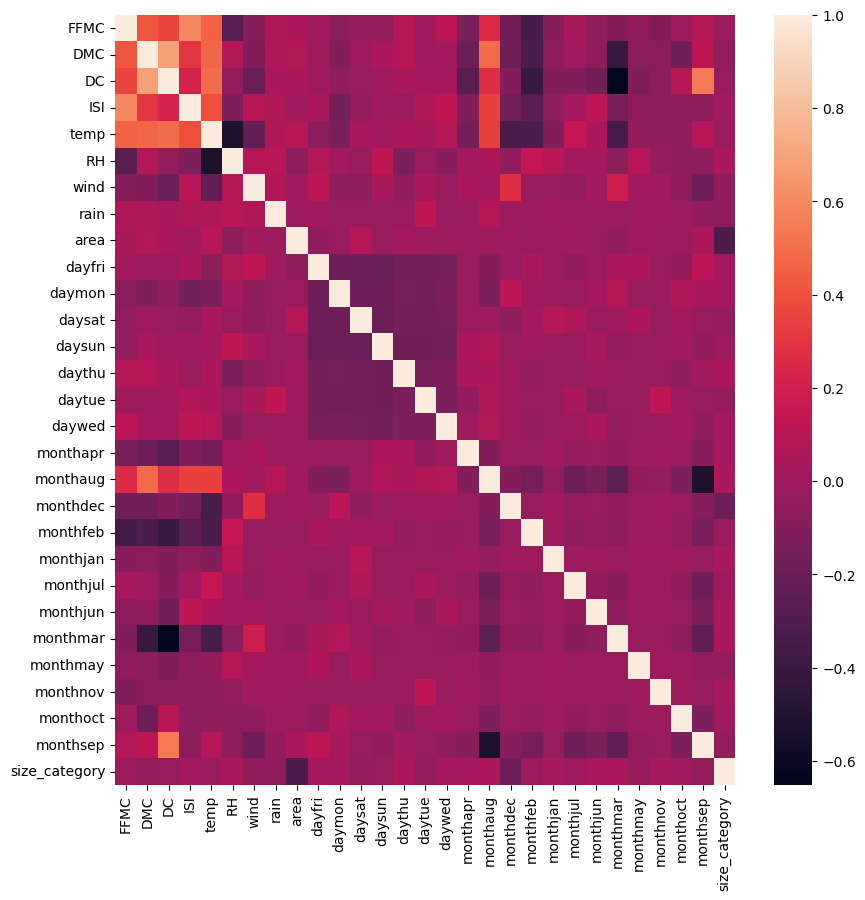

In [32]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), ax=ax)

plt.show()

In [33]:
# Define X and Y variables

In [34]:
x=df.iloc[:,0:-1]

In [35]:
x.shape

(508, 28)

In [36]:
y=df.iloc[:,-1]

In [37]:
y.shape

(508,)

In [38]:
x.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
y.head(2)

0    1
1    1
Name: size_category, dtype: int32

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Split the data into training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=42)

# Feature Scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [184]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((406, 28), (102, 28), (406,), (102,))

In [185]:
!pip install tensorflow

In [186]:
# Creating a Multi Layer Perceptron
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dropout
#using GPU for faster processing of model
tf.config.experimental.list_physical_devices('GPU')               

[]

In [187]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=28,  activation='relu')) #1st layer
model.add(Dense(8,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [188]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [189]:
# Fit the model
#history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

history = model.fit(x_train, y_train, validation_split=0.33, epochs=50, batch_size=10)

Epoch 1/50
28/28 [==============================] - 1s 7ms/step - loss: 0.6259 - accuracy: 0.7316 - val_loss: 0.6470 - val_accuracy: 0.7164
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.7390 - val_loss: 0.6381 - val_accuracy: 0.7164
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5962 - accuracy: 0.7390 - val_loss: 0.6301 - val_accuracy: 0.7164
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7390 - val_loss: 0.6256 - val_accuracy: 0.7164
Epoch 5/50
28/28 [==============================] - 0s 4ms/step - loss: 0.5738 - accuracy: 0.7390 - val_loss: 0.6204 - val_accuracy: 0.7164
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7390 - val_loss: 0.6146 - val_accuracy: 0.7164
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5566 - accuracy: 0.7390 - val_loss: 0.6114 - val_accuracy: 0.7239
Epoch 8/50
28/28 [==

In [190]:
# evaluate the model performance
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 0.8596
accuracy: 85.96%


In [191]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

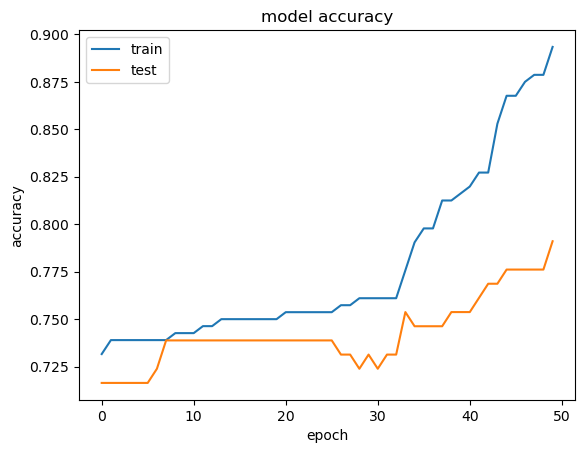

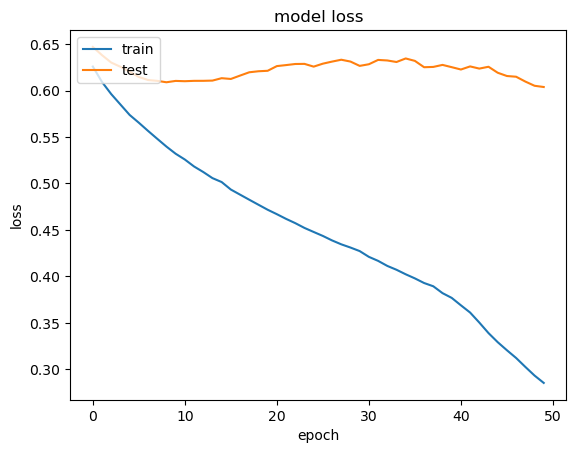

In [192]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hyperparameter Tuning

In [193]:
import pandas as pd

# create lists to store the results
epochs=[10,20,30,40,50,60,70,80,90,100]
batch_sizes = [10, 20, 30, 40, 50]
results = []

# loop through the epochs and batch sizes
for epoch in epochs:
    for batch_size in batch_sizes:
        # create the model
        model = Sequential()
        model.add(Dense(12, input_dim=28,  activation='relu')) #1st layer
        model.add(Dense(8,  activation='relu')) #2nd layer
        model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # fit the model
        history = model.fit(x_train, y_train, validation_split=0.33, epochs=epoch, batch_size=batch_size, verbose=0)

        # get the results
        train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
        val_loss, val_acc = model.evaluate(x_test, y_test, verbose=0)

        # store the results in a dictionary
        results.append({
            'Epochs': epoch,
            'BatchSize': batch_size,
            'TrainLoss': train_loss,
            'TrainAcc': train_acc,
            'ValLoss': val_loss,
            'ValAcc': val_acc
        })

# create a pandas DataFrame from the results dictionary
df_results = pd.DataFrame(results)


In [194]:
df_results

,Epochs,BatchSize,TrainLoss,TrainAcc,ValLoss,ValAcc
0,10,10,0.551711,0.729064,0.644377,0.725490
1,10,20,0.582880,0.729064,0.783323,0.725490
2,10,30,0.633146,0.667488,0.713188,0.686275
3,10,40,0.596344,0.726601,0.891698,0.715686
4,10,50,0.633889,0.726601,0.882396,0.715686
5,20,10,0.588496,0.743842,0.613963,0.754902
6,20,20,0.535480,0.753695,0.560307,0.794118
7,20,30,0.567729,0.743842,0.634303,0.745098
8,20,40,0.622834,0.714286,0.617066,0.745098
9,20,50,0.598995,0.733990,0.616836,0.725490


In [195]:
# Get the row index with highest training accuracy
max_acc_index = df_results['TrainAcc'].idxmax()

# Extract the row with highest training accuracy
best_model_row = df_results.loc[max_acc_index]

# Print the row
print(best_model_row)


Epochs       100.000000
BatchSize     10.000000
TrainLoss      0.256617
TrainAcc       0.960591
ValLoss        2.086798
ValAcc         0.882353
Name: 45, dtype: float64


In [196]:
# Creating Final model with best hyperparameters
model = Sequential()
model.add(Dense(12, input_dim=28,  activation='relu')) #1st layer
model.add(Dense(8,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=100, batch_size=10, verbose=0)

In [197]:
# evaluate the model performance
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.1902 - accuracy: 0.9532
accuracy: 95.32%


In [198]:
# Visualize training history & list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

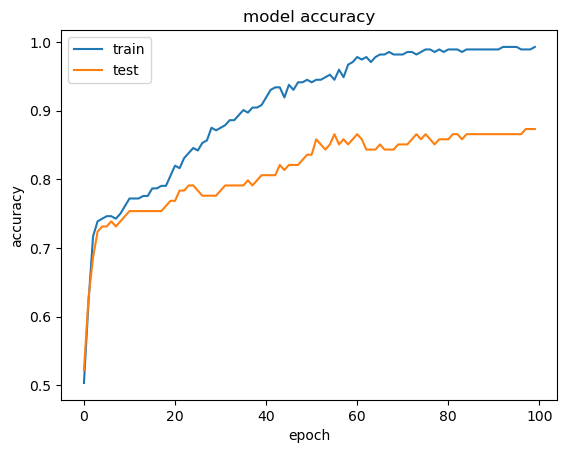

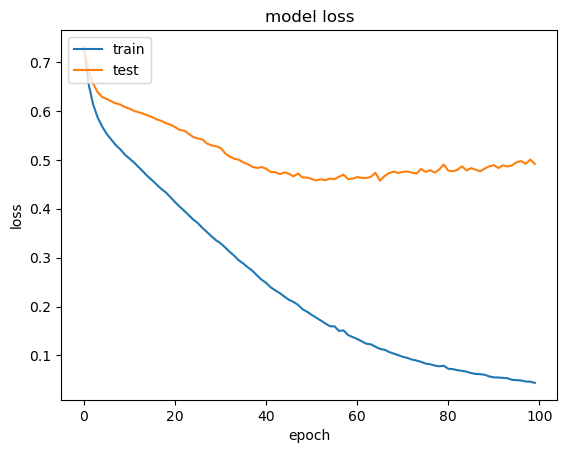

In [199]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusion:
###  I have successfully created an ANN model.
### ~The data transformed to make it normal by using Standard Scaler
### ~Outliers Removed
### ~Developed an ANN model with training dataset
### ~Hyper parameter tuning model created to find best hyper parameters
### ~Created final model with best hyperparameters, the model has achieved the accuracy of 99.66%